#CSE/STAT 416 Quiz Section - Methods Review

# In the beginning...

there was data. Probably about dinosaurs because they were here first.

<div>
<img src="https://static01.nyt.com/images/2020/04/07/science/26OBS-RAPTOR1/26TB-RAPTOR1-superJumbo.jpg" width="400"/>
</div><sup><sub>Image Source: New York Times (https://www.nytimes.com/2020/03/26/science/raptor-fossil-dinosaurs.html)</sup></sub>

|  Name |    Species    |    Diet   | Weight | Length | Spikes | Sex | Clutch Size | ... |
|:-----:|:-------------:|:---------:|:------:|:------:|:------:|:---:|:-----------:|:---:|
| Terry | Tyrannosaurus | Carnivore |  12.1t |  11.9m |   No   |  M  |      NA     | ... |
| Danny |   Diplodocus  | Herbivore |  13.1t |  32.2m |   No   |  F  |      3      | ... |
| Stacy |  Stegosaurus  | Herbivore |  6.8t  |  8.7m  |   Yes  |  F  |      7      | ... |
| Timmy |  Triceratops  | Herbivore |  9.3t  |  8.2m  |   Yes  |  M  |      NA     | ... |
|  ...  |      ...      |    ...    |   ...  |   ...  |   ...  | ... |     ...     | ... |

</div><sup><sub>Data Source: Like 20 minutes of wikipedia research and a lot of wild speculation.</sup></sub>

Thus far we have focused on two different data analysis approaches;


##Regression

|  Name |    Species    |    Diet   | Weight | Length | Spikes | Sex | Clutch Size | ... |
|:-----:|:-------------:|:---------:|:------:|:------:|:------:|:---:|:-----------:|:---:|
| Terry | Tyrannosaurus | Carnivore |  **12.1t** |  **11.9m** |   No   |  M  |      NA     | ... |
| Danny |   Diplodocus  | Herbivore |  **13.1t** |  **32.2m** |   No   |  F  |      3      | ... |
| Stacy |  Stegosaurus  | Herbivore |  **6.8t**  |  **8.7m**  |   Yes  |  F  |      7      | ... |
| Timmy |  Triceratops  | Herbivore |  **9.3t**  |  **8.2m**  |   Yes  |  M  |      NA     | ... |
|  ...  |      ...      |    ...    |   ...  |    ...    |   ...  | ... |     ...     | ... |

The problem of regression deals with using covariates to estimate a specific (continuous) quantity (e.g. Length or Weight). Given a set of covariates $X$ (Diet, Sex, Weight or Length, etc), we attempt to find a model $G$ that minimizes error between the estimated quantity $\hat{Y}=G(X)$ and the true observed $Y$.

##Classification


|  Name |    Species    |    Diet   | Weight | Length | Spikes | Sex | Clutch Size | ... |
|:-----:|:-------------:|:---------:|:------:|:------:|:------:|:---:|:-----------:|:---:|
| Terry | **Tyrannosaurus** | **Carnivore** |  12.1t |  11.9m |   **No**   |  **M**  |      NA     | ... |
| Danny |   **Diplodocus**  | **Herbivore** |  13.1t |  32.2m |   **No**   |  **F**  |      3      | ... |
| Stacy |  **Stegosaurus**  | **Herbivore** |  6.8t  |  8.7m  |   **Yes**  |  **F**  |      7      | ... |
| Timmy |  **Triceratops**  | **Herbivore** |  9.3t  |  8.2m  |   **Yes**  |  **M**  |      NA     | ... |
|  ...  |      ...      |    ...    |   ...  |    ...    |   ...  | ... |     ...     | ... |

The problem of classification deals with using covariates to estimate a specific classes (e.g. Species, Diet, Spike-havingness). Given a set of covariates $X$, we attempt to find a model that maximizes the probability of $P(\hat{Y}=y|X).$

#Methods for Regression

We will first consider the task of regression, using the dinosaur clutch survival rate data collected by Dr. Emmett Brown. In this regression task, we want to find a model that closely predicts *Clutch Survival Rate* $Y$ from the *Average Nest Temperature* $X$. 

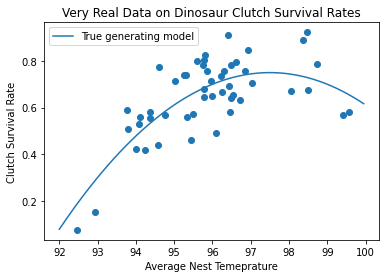

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(101)
reg_x=np.random.normal(95.5,1.5,(50))
reg_y=-(1/45)*reg_x**2+(13/3)*reg_x-210.5+np.random.normal(0,0.1,(50))
reg_x_true=np.arange(92,100,.05)
a=-1/45; b=13/3; c=-210.5
reg_y_true=a*reg_x_true**2+b*reg_x_true+c

fig,ax=plt.subplots()
ax.scatter(reg_x,reg_y)
ax.set_ylabel("Clutch Survival Rate")
ax.set_xlabel("Average Nest Temeprature")
ax.set_title("Very Real Data on Dinosaur Clutch Survival Rates")
plt.plot(reg_x_true,reg_y_true,label="True generating model")
plt.legend()
plt.show()

##Linear Regression

Our first approach to fitting regression models is simple linear regression. Here we attempt to fit a linear relationship between our output $Y$ and our input $X$. Mathematically, we want to find $\vec\beta$ such that: $$\hat Y=\beta_0+\beta_1 X_1+ \beta_2 X_2+....$$ $$\min_\vec\beta\sum_i (Y_i-\hat Y_i)^2$$



###Linear Regression is...



<!-- *  Generative (Meaning we model the underlying distributions) is it? -->
*  Contains no hyperparameters
<!-- *  Can use any number of parameters -->
*  Can use continuous data or encoded categorical data


###Advantages



*   Interpretable: $\beta_i$ gives us an idea of the relationship between $X_i$ and $Y$
*   Quick to train and predict



###Disadvantages

* Requires manual feature selection to avoid overfitting
* Assumes a linear relationship between target $Y$ and features $X$
* Assumes noise with 0 mean

###Example

Using: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

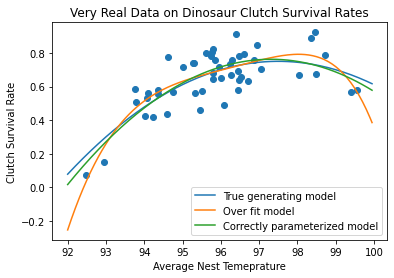

Coefficients:  [[ 5.15051465 -0.02646455]] [-249.83531994]
Truth:  4.333333333333333 -0.022222222222222223 -210.5


In [ ]:
from sklearn import linear_model

#First we create some features by taking exponential powers of X
#Forgive my terrible use of Pandas, I've always preferred grizzlies 
pd_reg_y=pd.DataFrame(reg_y)
pd_reg_x=pd.DataFrame([reg_x**1, reg_x**2, reg_x**3, reg_x**4, reg_x**5, 
                       reg_x**6, reg_x**7, reg_x**8, reg_x**9, reg_x**10]).T
pd_reg_x.columns=['1','2','3','4','5','6','7','8','9','10']
pd_reg_x_predict=pd.DataFrame([reg_x_true**1, reg_x_true**2, reg_x_true**3, reg_x_true**4, reg_x_true**5, 
                               reg_x_true**6, reg_x_true**7, reg_x_true**8, reg_x_true**9, reg_x_true**10]).T  
pd_reg_x_predict.columns=['1','2','3','4','5','6','7','8','9','10']

#Then we will fit two models, one proper model, and one overfit model
lin_reg=linear_model.LinearRegression()
lin_reg.fit(pd_reg_x[['1','2']],pd_reg_y) #We will fit a 'correct' model with only X^1, and X^2 terms                 
lin_reg_overfit=linear_model.LinearRegression()
lin_reg_overfit.fit(pd_reg_x,pd_reg_y) #We will also overfit a model with all X^i, i in [0,10]   

#Plot two models and truth
fig,ax=plt.subplots()
ax.scatter(reg_x,reg_y)
ax.set_ylabel("Clutch Survival Rate")
ax.set_xlabel("Average Nest Temeprature")
ax.set_title("Very Real Data on Dinosaur Clutch Survival Rates")
plt.plot(reg_x_true,reg_y_true,label="True generating model")
plt.plot(reg_x_true,lin_reg_overfit.predict(pd_reg_x_predict),label="Over fit model")
plt.plot(reg_x_true,lin_reg.predict(pd_reg_x_predict[['1','2']]),label="Correctly parameterized model")
plt.legend()
plt.show()
print("Coefficients: ",lin_reg.coef_,lin_reg.intercept_)
print("Truth: ",b,a,c)

##Ridge Regression

We can build on linear regression by introducing a penalty on the magnitude of our model coefficients. For *Ridge Regression*, we penalize according to the squared norm of the vector $\hat\beta$. Mathematically, we want to find $\vec\beta$ such that: $$\hat Y=\beta_0+\beta_1 X_1+ \beta_2 X_2+....$$ $$\min_\vec\beta\sum_i (Y_i-\hat Y_i)^2+\lambda ||\beta||_2$$


###Ridge Regression is...



<!-- *  Generative -->
*  Contains the hyperparameter $\lambda$
<!-- *  Can use any number of parameters -->
*  Can use continuous data or encoded categorical data


###Advantages



*   Interpretable: $\beta_i$ gives us an idea of the relationship between $X_i$ and $Y$
*   Quick to train and predict
* Robust to overfitting (with good selection of $\lambda$)
<!-- * Quasi-feature selection via driving some features toward 0. -->



###Disadvantages

* Assumes a linear relationship between target $Y$ and features $X$
* Assumes noise with 0 mean
* Requires selecting hyperparameter $\lambda$, ie using validation data

###Example

Using: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

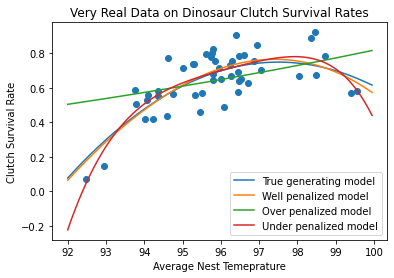

Well penalized min/max coef:  -7.028927013121858e-13   0.30062470546756515
Over penalized min/max coef:  4.70273865750222e-22   0.004544076445093791
Under penalized min/max coef:  -0.5880504872233902   349.29533966377716


In [ ]:
#Then we will fit two models, one proper model, and one overfit model
ridge_reg=linear_model.Ridge(alpha=.0005,normalize=True,random_state=1) 
ridge_reg.fit(pd_reg_x,pd_reg_y)
ridge_reg_overpen=linear_model.Ridge(alpha=5,normalize=True,random_state=1) 
ridge_reg_overpen.fit(pd_reg_x,pd_reg_y)
ridge_reg_underpen=linear_model.Ridge(alpha=.0000000001,normalize=True,random_state=1) 
ridge_reg_underpen.fit(pd_reg_x,pd_reg_y)

#Plot all 3 models and truth
fig,ax=plt.subplots()
ax.scatter(reg_x,reg_y)
ax.set_ylabel("Clutch Survival Rate")
ax.set_xlabel("Average Nest Temeprature")
ax.set_title("Very Real Data on Dinosaur Clutch Survival Rates")
plt.plot(reg_x_true,reg_y_true,label="True generating model")
plt.plot(reg_x_true,ridge_reg.predict(pd_reg_x_predict),label="Well penalized model")
plt.plot(reg_x_true,ridge_reg_overpen.predict(pd_reg_x_predict),label="Over penalized model")
plt.plot(reg_x_true,ridge_reg_underpen.predict(pd_reg_x_predict),label="Under penalized model")
plt.legend()
plt.show()
print("Well penalized min/max coef: ",np.min(ridge_reg.coef_)," ",np.max(ridge_reg.coef_))
print("Over penalized min/max coef: ",np.min(ridge_reg_overpen.coef_)," ",np.max(ridge_reg_overpen.coef_))
print("Under penalized min/max coef: ",np.min(ridge_reg_underpen.coef_)," ",np.max(ridge_reg_underpen.coef_))

##Lasso Regression

In the same vein as Ridge Regression, *Lasso Regression* seeks to penalize the parameter vector $\vec\beta$ according to a 1-norm. This changes the solution space to something that is no longer smooth (as the $|abs|$ function is not differentiable at 0). Mathematically, we want to find $\vec\beta$ such that: $$\hat Y=\beta_0+\beta_1 X_1+ \beta_2 X_2+....$$ $$\min_\vec\beta\sum_i (Y_i-\hat Y_i)^2+\lambda ||\beta||_1$$


###Lasso Regression is...



<!-- *  Generative -->
*  Contains the hyperparameter $\lambda$
<!-- *  Can use any number of parameters -->
*  Can use continuous data or encoded categorical data


###Advantages



*   Interpretable: $\beta_i$ gives us an idea of the relationship between $X_i$ and $Y$
*   Quick to train and predict
* Robust to overfitting (with good selection of $\lambda$)
* Feature selection via driving parameters to 0. (LASSO stands for least absolute shrinkage and selection operator - feature selection is literally in the name!)



###Disadvantages

* Assumes a linear relationship between target $Y$ and features $X$
* Assumes noise with 0 mean
* Slower to fit due to the lack of smooth solution space
* Requires selecting hyperparameter $\lambda$, ie using validation data

###Example

Using: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
lasso_reg_underpen = linear_model.Lasso(alpha=1e-10,normalize=True,random_state=1)
lasso_reg_underpen.fit(pd_reg_x, pd_reg_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2618995219971941, tolerance: 0.00013671624141454837
  positive)


Lasso(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01953669391473334, tolerance: 0.00013671624141454837
  positive)


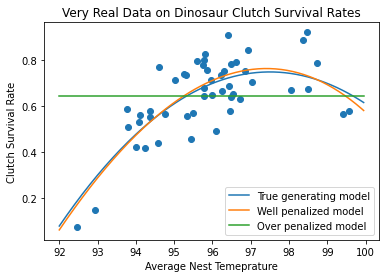

Well penalized min/max coef:  -1.8999087940000123e-10   0.7845687499282594
Over penalized min/max coef:  0.0   0.0


In [ ]:
#Then we will fit two models, one proper model, and one overfit model
lasso_reg=linear_model.Lasso(alpha=.00005,normalize=True,random_state=1) 
lasso_reg.fit(pd_reg_x,pd_reg_y)
lasso_reg_overpen=linear_model.Lasso(alpha=5,normalize=True,random_state=1) 
lasso_reg_overpen.fit(pd_reg_x,pd_reg_y)
#I was unable to underpenalize! Even a very small alpha was driving values to 0.

#Plot 2 models and truth
fig,ax=plt.subplots()
ax.scatter(reg_x,reg_y)
ax.set_ylabel("Clutch Survival Rate")
ax.set_xlabel("Average Nest Temeprature")
ax.set_title("Very Real Data on Dinosaur Clutch Survival Rates")
plt.plot(reg_x_true,reg_y_true,label="True generating model")
plt.plot(reg_x_true,lasso_reg.predict(pd_reg_x_predict),label="Well penalized model")
plt.plot(reg_x_true,lasso_reg_overpen.predict(pd_reg_x_predict),label="Over penalized model")
plt.legend()
plt.show()
print("Well penalized min/max coef: ",np.min(lasso_reg.coef_)," ",np.max(lasso_reg.coef_))
print("Over penalized min/max coef: ",np.min(lasso_reg_overpen.coef_)," ",np.max(lasso_reg_overpen.coef_))

#Methods for Classification

We now move to the problem of classification, again using data provided by the eminent Dr. Brown. 

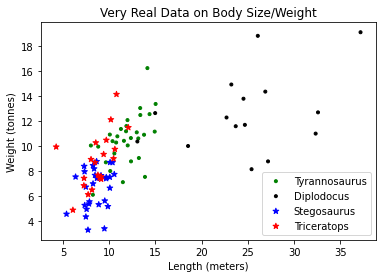

In [ ]:
np.random.seed(10)
Tyran={'Wmean':11,'Wstd':2,  'Lmean':12,'Lstd':2.2,'Spikes':0,'Herb':0,'n':30,'plotcol':'green'}
Diplo={'Wmean':13,'Wstd':2.5,'Lmean':25,'Lstd':6.5,'Spikes':0,'Herb':1,'n':15,'plotcol':'black'}
Stego={'Wmean':7, 'Wstd':1.5,'Lmean':9, 'Lstd':1.5,'Spikes':1,'Herb':1,'n':30,'plotcol':'blue'}
Trice={'Wmean':9, 'Wstd':2,  'Lmean':9, 'Lstd':1.8,'Spikes':1,'Herb':1,'n':20,'plotcol':'red'}
def sampleDino(dinodict):
    sd1=dinodict['Wstd']
    sd2=dinodict['Lstd']
    cov=np.array([[sd1**2,.4*sd1*sd2],[.4*sd1*sd2,sd2**2]])
    wandl=np.random.multivariate_normal([dinodict['Wmean'],dinodict['Lmean']],cov,size=dinodict['n'])
    out_pd=pd.DataFrame({'Weight':wandl[:,0],'Length':wandl[:,1],'Spikes':dinodict['Spikes'],'Herb':dinodict['Herb'],'pcol':dinodict['plotcol']})
    return(out_pd)

d1=sampleDino(Tyran)
d2=sampleDino(Diplo)
d3=sampleDino(Stego)
d4=sampleDino(Trice)
cat_data=pd.concat([d1,d2,d3,d4])

fig,ax=plt.subplots()
a1=plt.scatter(d1['Length'],d1['Weight'],c=d1['pcol'],marker='.')
a2=plt.scatter(d2['Length'],d2['Weight'],c=d2['pcol'],marker='.')
a3=plt.scatter(d3['Length'],d3['Weight'],c=d3['pcol'],marker='*')
a4=plt.scatter(d4['Length'],d4['Weight'],c=d4['pcol'],marker='*')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Very Real Data on Body Size/Weight")
plt.legend(('Tyrannosaurus','Diplodocus','Stegosaurus','Triceratops'))
plt.show()

We will attempt to find models that can classify the carivores (Tyrannosaurus) vs herbivores (Diplodocus, Stegosaurus, Triceratops) using only weight, length, and spike-havingness (represented by the spikiness of the points in the plot).

##Assessing Classification

Unlike in regression where we have a mathematical error we are trying to minimize, in classification we aim to maximize the probability of each data point being correctly classified. To this end we define four distinct types of responses, based on the true class and predicted class of a data point. 

|                            |                            |                |
|:--------------------------:|:--------------------------:|:--------------:|
|   True Positive [TP] (Correct)  | False Negative [FN] (Incorrect) | **Label Positive** |
| False Positive [FP] (Incorrect) |   True Negative [TN] (Correct)  | **Label Negative** |
|     **Predicted Positive**     |     **Predicted Negative**     |                |

True positives (TP) and true negatives (TN) are correctly classified classes, where we associate one class as a baseline. In our case herbivores (TP) are the base 'positive' class with $herb=1$. False negatives (FN) and false positives (FP) represent unique errors where, in our case we are classifying an herbivore as a carnivore (FN) or a carnivore as an herbivore (FP). 

Because these mistakes may have different consequences (especially for Dr. Brown), we may prefer a model that errs one way or another. Consult the notes for more discussion on this topic, and for different metrics for measuring classification error (such as ROC curves).

Note that we can expand this to more than 2 classes, with a 'confusion matrix' showing each missclassification by truth/predicted.

##Logistic Regression

Logistic regression builds on the concept of linear regression, seeking to find a model that takes on negative values of score $\vec\beta X$ for one class, and positive values of score $\vec\beta X$ for the other. We pass this through a sigmoid function to produce a probability of membership in each class. Mathematically, we want to find $\vec\beta$ such that: $$\max_\vec\beta \,\,  \prod_i P( Y_i=1|X_i)I(Y_i=1)+P(Y_i=0|X_i)I(Y_i=0)$$ $$P(Y_i=1|X_i)=\frac{1}{1+e^{-\hat\beta X_i}}$$

The function $f(x)=\frac{1}{1+e^{-x}}$ is known as the sigmoid function, which ensures values fall between $(0,1)$.
<div>
<img src="https://mathworld.wolfram.com/images/eps-gif/SigmoidFunction_701.gif" width="200"/>
</div><sup><sub>Image Source: wolfram.com (https://mathworld.wolfram.com/SigmoidFunction.html)</sup></sub>




###Logistic Regression is...



*  Discriminative (It tries to model the boundary between classes)
<!-- *  Can use any number of parameters -->
*  Can use continuous data or encoded categorical data


###Advantages



*   Somewhat interpretable: $\beta_i$ signs gives us an idea of the direction of the relationship between $X_i$ and $Y$
*   Simple implementation similar to linear regression
* Can implement LASSO penalization for feature selection
* Includes option hyperparameter threshold for classifying (Assumed True if $P(Y=1|X)>p$, $p=.5$ can be changed)



###Disadvantages

* Includes regularization hyperparameter $\lambda$ (if used)
* Assumes a linear separation of classes

###Example

Using: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

TP: 63  TN: 29  FP: 1  FN: 2


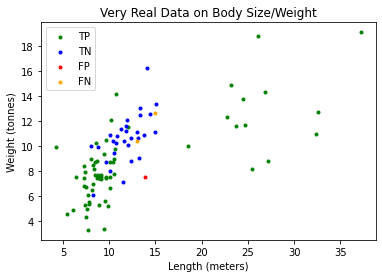

[[-0.29516804  0.33426468  4.0900738 ]]


In [ ]:
logreg_cat=linear_model.LogisticRegression(random_state=1)
logreg_cat.fit(cat_data[['Weight','Length','Spikes']],cat_data['Herb'])
logreg_pred=logreg_cat.predict(cat_data[['Weight','Length','Spikes']])
TP=(logreg_pred==1)*(np.array(cat_data['Herb']==1))
TN=(logreg_pred==0)*(np.array(cat_data['Herb']==0))
FP=(logreg_pred==1)*(np.array(cat_data['Herb']==0))
FN=(logreg_pred==0)*(np.array(cat_data['Herb']==1))
print("TP:",sum(TP)," TN:",sum(TN)," FP:",sum(FP)," FN:",sum(FN))

fig,ax=plt.subplots()
a1=plt.scatter(cat_data[TP]['Length'],cat_data[TP]['Weight'],c='green',marker='.')
a1=plt.scatter(cat_data[TN]['Length'],cat_data[TN]['Weight'],c='blue',marker='.')
a1=plt.scatter(cat_data[FP]['Length'],cat_data[FP]['Weight'],c='red',marker='.')
a1=plt.scatter(cat_data[FN]['Length'],cat_data[FN]['Weight'],c='orange',marker='.')

ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Very Real Data on Body Size/Weight")
plt.legend(('TP','TN','FP','FN'))
plt.show()

print(logreg_cat.coef_)
#What's the last coefficient here?

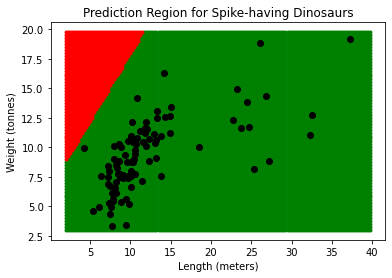

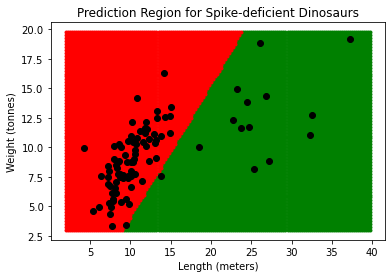

In [ ]:
leng = np.arange(2,40, .25)
weig = np.arange(3, 20, .25)
l1,w1 = np.meshgrid(leng, weig)
l1=l1.flatten()
w1=w1.flatten()
grid_spike=pd.DataFrame({'Weight':w1,'Length':l1,'Spikes':1,'Herb':0,'pcol':'red'})
grid_nospike=pd.DataFrame({'Weight':w1,'Length':l1,'Spikes':0,'Herb':0,'pcol':'red'})
logreg_pred_spike=logreg_cat.predict(grid_spike[['Weight','Length','Spikes']])
logreg_pred_nospike=logreg_cat.predict(grid_nospike[['Weight','Length','Spikes']])

fig,ax=plt.subplots()
plt.scatter(grid_spike[(logreg_pred_spike==1)]['Length'],grid_spike[(logreg_pred_spike==1)]['Weight'],c='green',marker='.')
plt.scatter(grid_spike[(logreg_pred_spike==0)]['Length'],grid_spike[(logreg_pred_spike==0)]['Weight'],c='red',marker='.')
plt.scatter(cat_data['Length'],cat_data['Weight'],c='black')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Prediction Region for Spike-having Dinosaurs")
plt.show()

fig,ax=plt.subplots()
plt.scatter(grid_nospike[(logreg_pred_nospike==1)]['Length'],grid_nospike[(logreg_pred_nospike==1)]['Weight'],c='green',marker='.')
plt.scatter(grid_nospike[(logreg_pred_nospike==0)]['Length'],grid_nospike[(logreg_pred_nospike==0)]['Weight'],c='red',marker='.')
plt.scatter(cat_data['Length'],cat_data['Weight'],c='black')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Prediction Region for Spike-deficient Dinosaurs")
plt.show()
#What does spike-havingness do to the score function?

##Naive Bayes

Naive Bayes is a simple probabilistic framework for classifiers, by applying a naive approximation to Bayes' theorem (hence the name). By assuming features of the model are independent, a naive and likely incorrect assumption, Naive Bayes estimates parameters to model probabilistic distributions on classes such that: $$P(Y=y|x_1,x_2,...)=\prod_i P(x_i|Y=y) P(Y=y)/P(x_i)$$





###Naive Bayes is...



*  Generative, we fit specific $P(X|Y)$ to data.
<!-- *  Can use any number of parameters -->
*  Can use continuous data or categorical data


###Advantages



*   Interpretable - we put specific distributions on $P(X|Y)$ that we can assess
*   Robust to overfitting



###Disadvantages

* Requires independence assumption of features (Rarely true)
* Requires distributional assumptions on the data (IE: Gaussian, Binomial, etc)
* Not easy to mix continuous and categorical data, which is why...

###No Example...

See: https://scikit-learn.org/stable/modules/naive_bayes.html

#Methods for Regression or Classification

##Decision Trees

A *Decision Tree* can be used for either regression or classification, with almost identical application. Don't tell Jack I said this, but a *Decision Tree* is just a collection of if/else statements, on which we branch the tree based on the input data $X$. At each node of the tree, the value of one feature is checked, proceeding left or right based on the response. This decision tree looks at the healthiness of humans and dinosaurs (dinosaurs of course sticking to a Jurassic diet - no fast food)
<div>
<img src="https://www.tutorialspoint.com/machine_learning_with_python/images/decision_tree_introduction.jpg" width="500"/>
</div><sup><sub>Image Source: tutorialspoint.com (https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_decision_tree.htm)</sup></sub>

Data is sorted along the tree till reaching the leaves, with all data points in each leaf taking on the same value. For a regression problem, leaves are typically assigned the average value of all data points. For a classification problem, a majority class classifier is used.


###Decision Trees are...



*  Discriminative (It tries to model the boundary between classes)
<!-- *  Can use any number of parameters -->
*  Can use continuous data or categorical data


###Advantages



*   Interpretable - the entire breakdown and decision process can be seen
*   Simple implementation
*   Simple prediction, can easily be done by hand



###Disadvantages

* Requires selecting an appropriate tree depth
* Requires choosing splitting/stopping criterions
* Easy to overfit
<!-- * Ignores relationships between factors -->

###Example - Classification

Using: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
For Regression: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

TP: 65  TN: 30  FP: 0  FN: 0


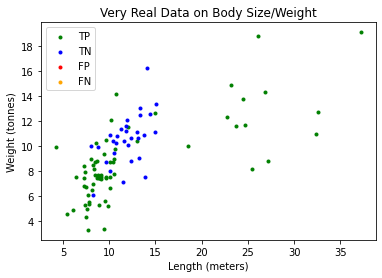

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree_cat=DecisionTreeClassifier(random_state=1)

dectree_cat.fit(cat_data[['Weight','Length','Spikes']],cat_data['Herb'])
dectree_pred=dectree_cat.predict(cat_data[['Weight','Length','Spikes']])
TP=(dectree_pred==1)*(np.array(cat_data['Herb']==1))
TN=(dectree_pred==0)*(np.array(cat_data['Herb']==0))
FP=(dectree_pred==1)*(np.array(cat_data['Herb']==0))
FN=(dectree_pred==0)*(np.array(cat_data['Herb']==1))
print("TP:",sum(TP)," TN:",sum(TN)," FP:",sum(FP)," FN:",sum(FN))

fig,ax=plt.subplots()
a1=plt.scatter(cat_data[TP]['Length'],cat_data[TP]['Weight'],c='green',marker='.')
a1=plt.scatter(cat_data[TN]['Length'],cat_data[TN]['Weight'],c='blue',marker='.')
a1=plt.scatter(cat_data[FP]['Length'],cat_data[FP]['Weight'],c='red',marker='.')
a1=plt.scatter(cat_data[FN]['Length'],cat_data[FN]['Weight'],c='orange',marker='.')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Very Real Data on Body Size/Weight")
plt.legend(('TP','TN','FP','FN'))
plt.show()

#No errors? That looks promising... 

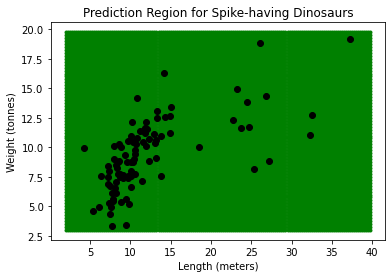

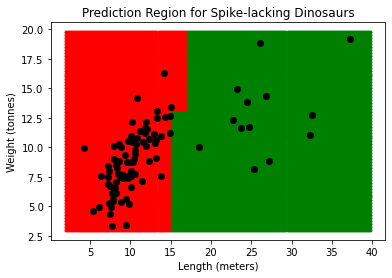

In [ ]:
dectree_pred_spike=dectree_cat.predict(grid_spike[['Weight','Length','Spikes']])
dectree_pred_nospike=dectree_cat.predict(grid_nospike[['Weight','Length','Spikes']])

fig,ax=plt.subplots()
plt.scatter(grid_spike[(dectree_pred_spike==1)]['Length'],grid_spike[(dectree_pred_spike==1)]['Weight'],c='green',marker='.')
plt.scatter(grid_spike[(dectree_pred_spike==0)]['Length'],grid_spike[(dectree_pred_spike==0)]['Weight'],c='red',marker='.')
plt.scatter(cat_data['Length'],cat_data['Weight'],c='black')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Prediction Region for Spike-having Dinosaurs")
plt.show()

fig,ax=plt.subplots()
plt.scatter(grid_nospike[(dectree_pred_nospike==1)]['Length'],grid_nospike[(dectree_pred_nospike==1)]['Weight'],c='green',marker='.')
plt.scatter(grid_nospike[(dectree_pred_nospike==0)]['Length'],grid_nospike[(dectree_pred_nospike==0)]['Weight'],c='red',marker='.')
plt.scatter(cat_data['Length'],cat_data['Weight'],c='black')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Prediction Region for Spike-lacking Dinosaurs")
plt.show()

#Hard to tell but this is a bit overfit

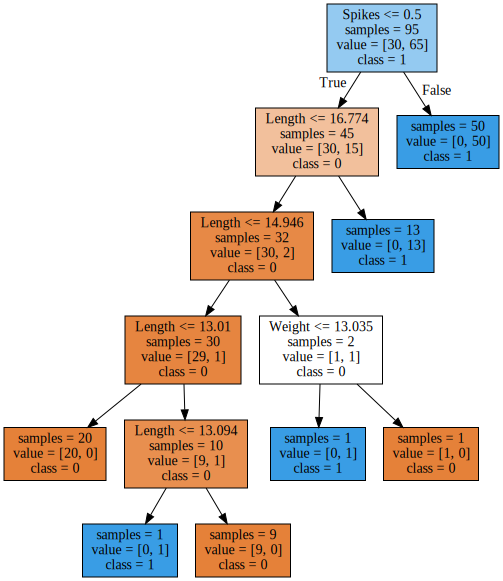

In [ ]:
from sklearn import tree

# Hack to fail gracefully if graphviz is not installed
try:
    import graphviz

    def draw_tree(tree_model, features):
        """
        visualizes a Decision Tree
        """
        tree_data = tree.export_graphviz(tree_model, 
                                     impurity=False, 
                                     feature_names=features,
                                     class_names=tree_model.classes_.astype(str),
                                     filled=True,
                                     out_file=None)
        graph = graphviz.Source(tree_data) 
        display(graph)
        
    draw_tree(dectree_cat, ['Weight','Length','Spikes'])
except:
    print('Graphviz not installed.')

##Random Forests

If one tree is good, then a lot of trees must be better. A *Random Forest* fits multiple decision trees and determines the class (or regression value) by majority vote (or averaging) of all tree predictions.


###Random Forests are...



*  Discriminative
<!-- *  Can use any number of parameters -->
*  Can use continuous data or categorical data


###Advantages


*   Simple implementation
*  Parallelizable training and prediction
* Not as subject to overfitting as Decision Trees




###Disadvantages


* Not interpretable - we cannot interpret the forest from the trees
* Requires selecting an appropriate tree depth
* Requires choosing splitting/stopping criterions
<!-- * Ignores relationships between factors -->



### Feature Importance





https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
Definitely check this out. 

*   The impurity-based feature importance of random forests suffers from being computed on **statistics derived from the training dataset**: the importances can be high even for features that are not predictive of the target variable, as long as the model has the capacity to use them to overfit.
*   The permutation importance utilizes out-of-bag data, so it doesn't suffer much from above issue.

###Example - Regression

Using: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

For regression: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


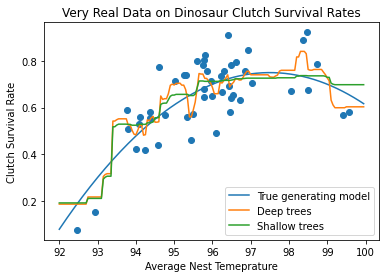

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ranfor_reg_deep=RandomForestRegressor(max_depth=5, random_state=1)
ranfor_reg_shallow=RandomForestRegressor(max_depth=2, random_state=1)

#We will fit a deep forest and a shallower forest
ranfor_reg_deep.fit(pd_reg_x,pd_reg_y)             
ranfor_reg_shallow.fit(pd_reg_x,pd_reg_y) 

#Plot 2 models and the truth
fig,ax=plt.subplots()
ax.scatter(reg_x,reg_y)
ax.set_ylabel("Clutch Survival Rate")
ax.set_xlabel("Average Nest Temeprature")
ax.set_title("Very Real Data on Dinosaur Clutch Survival Rates")
plt.plot(reg_x_true,reg_y_true,label="True generating model")
plt.plot(reg_x_true,ranfor_reg_deep.predict(pd_reg_x_predict),label="Deep trees")
plt.plot(reg_x_true,ranfor_reg_shallow.predict(pd_reg_x_predict),label="Shallow trees")
plt.legend()
plt.show()

##AdaBoost

*AdaBoost* expands on random forests by both adding and subtracting from them. The *AdaBoost* algorithm similarly seeks to fit a collection of models to the data, but unlike the random forest it limits each model to a *decision stump*, or a decision tree with only a single node. 

It then builds on this further by introducing weights to each of these *weak learners*, and takes a weighted vote (or weighted average) rather than a majority (or unweighted average).


###AdaBoost is...



*  Discriminative
<!-- *  Can use any number of parameters -->
*  Can use continuous data or categorical data


###Advantages

*  Usually better at prediction than random forests


###Disadvantages

* Not interpretable - weights on stumps give us some idea of stump importance, but little else
* Requires selecting total number of stumps
* Ignores relationships between factors
* Prediction time scales with number of stumps
* Requires fitting weights, making parallelization impossible

###Example - Classification

Using: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

For regression: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

TP: 65  TN: 30  FP: 0  FN: 0


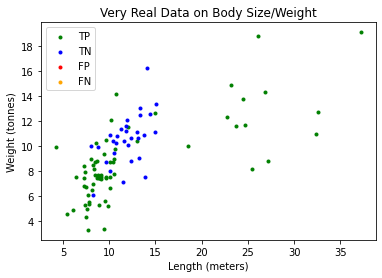

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_cat=AdaBoostClassifier(n_estimators=100, random_state=1)
adaboost_cat.fit(cat_data[['Weight','Length','Spikes']],cat_data['Herb'])
adaboost_pred=adaboost_cat.predict(cat_data[['Weight','Length','Spikes']])
TP=(adaboost_pred==1)*(np.array(cat_data['Herb']==1))
TN=(adaboost_pred==0)*(np.array(cat_data['Herb']==0))
FP=(adaboost_pred==1)*(np.array(cat_data['Herb']==0))
FN=(adaboost_pred==0)*(np.array(cat_data['Herb']==1))
print("TP:",sum(TP)," TN:",sum(TN)," FP:",sum(FP)," FN:",sum(FN))

fig,ax=plt.subplots()
a1=plt.scatter(cat_data[TP]['Length'],cat_data[TP]['Weight'],c='green',marker='.')
a1=plt.scatter(cat_data[TN]['Length'],cat_data[TN]['Weight'],c='blue',marker='.')
a1=plt.scatter(cat_data[FP]['Length'],cat_data[FP]['Weight'],c='red',marker='.')
a1=plt.scatter(cat_data[FN]['Length'],cat_data[FN]['Weight'],c='orange',marker='.')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Very Real Data on Body Size/Weight")
plt.legend(('TP','TN','FP','FN'))
plt.show()

#No errors? That might be a little concerning...

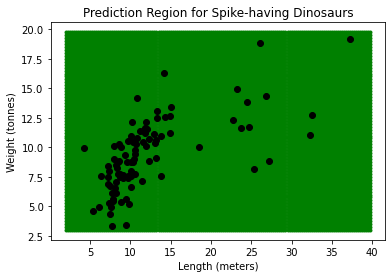

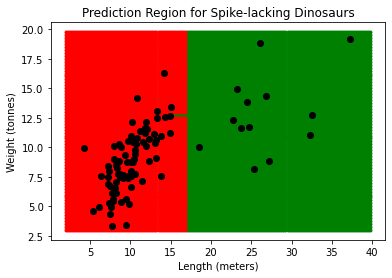

In [ ]:
adaboost_pred_spike=adaboost_cat.predict(grid_spike[['Weight','Length','Spikes']])
adaboost_pred_nospike=adaboost_cat.predict(grid_nospike[['Weight','Length','Spikes']])

fig,ax=plt.subplots()
plt.scatter(grid_spike[(adaboost_pred_spike==1)]['Length'],grid_spike[(adaboost_pred_spike==1)]['Weight'],c='green',marker='.')
plt.scatter(grid_spike[(adaboost_pred_spike==0)]['Length'],grid_spike[(adaboost_pred_spike==0)]['Weight'],c='red',marker='.')
plt.scatter(cat_data['Length'],cat_data['Weight'],c='black')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Prediction Region for Spike-having Dinosaurs")
plt.show()

fig,ax=plt.subplots()
plt.scatter(grid_nospike[(adaboost_pred_nospike==1)]['Length'],grid_nospike[(adaboost_pred_nospike==1)]['Weight'],c='green',marker='.')
plt.scatter(grid_nospike[(adaboost_pred_nospike==0)]['Length'],grid_nospike[(adaboost_pred_nospike==0)]['Weight'],c='red',marker='.')
plt.scatter(cat_data['Length'],cat_data['Weight'],c='black')
ax.set_ylabel("Weight (tonnes)")
ax.set_xlabel("Length (meters)")
ax.set_title("Prediction Region for Spike-lacking Dinosaurs")
plt.show()

#Remember, we had no errors - this is very overfit to catch the few unspiked herivores mixed in with the carnivores
# Look at the strand of green around Weight = 13t

##K Nearest Neighbors

K-nearest neighbors is another very simple approach to either classification or regression. Similarly to how decision trees classify or estimate a value based on similar points in a given leaf, K-nearest neighbors finds points in the 'training data' that are close to a given input $X$, and averages (or majority votes) for the value (or class) of the input.

###K Nearest Neighbors is...



*  Discriminative
<!-- *  Can use any number of parameters -->
*  Can use continuous data or categorical data, with appropriate distance metrics


###Advantages


* Simple implementation
* Zero training time



###Disadvantages


* Requires selection of number of neighbors
* Requires selecting distance metric
* Assumes sufficient data for interpolation
* Prediction requires calculation of many distances


###Example - Regression

Using: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

For classification: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

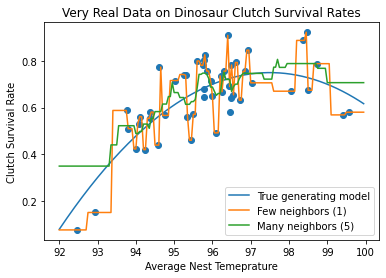

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

kneigh_reg_goodsocialdistancing=KNeighborsRegressor(n_neighbors=1)
kneigh_reg_poorsocialdistancing=KNeighborsRegressor(n_neighbors=5)

#Then we will fit two models, one proper model, and one overfit model
kneigh_reg_goodsocialdistancing.fit(pd_reg_x,pd_reg_y) #We will fit a 'correct' model with only X^1, and X^2 terms                 
kneigh_reg_poorsocialdistancing.fit(pd_reg_x,pd_reg_y) #We will also overfit a model with all X^i, i in [0,10]   

#Plot all 3 models
fig,ax=plt.subplots()
ax.scatter(reg_x,reg_y)
ax.set_ylabel("Clutch Survival Rate")
ax.set_xlabel("Average Nest Temeprature")
ax.set_title("Very Real Data on Dinosaur Clutch Survival Rates")
plt.plot(reg_x_true,reg_y_true,label="True generating model")
plt.plot(reg_x_true,kneigh_reg_goodsocialdistancing.predict(pd_reg_x_predict),label="Few neighbors (1)")
plt.plot(reg_x_true,kneigh_reg_poorsocialdistancing.predict(pd_reg_x_predict),label="Many neighbors (5)")
plt.legend()
plt.show()